# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.task_sample import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 4.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

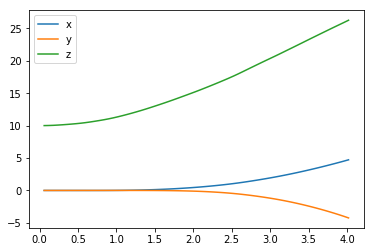

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

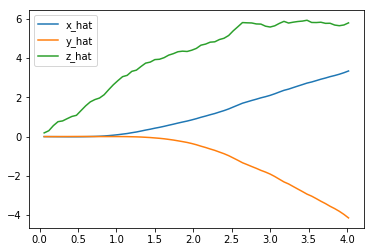

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

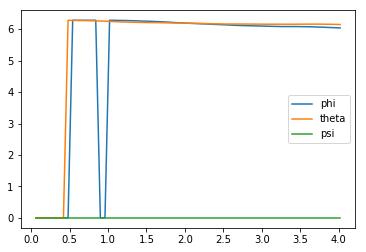

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

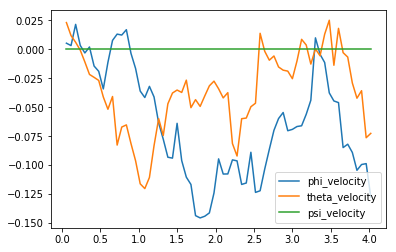

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

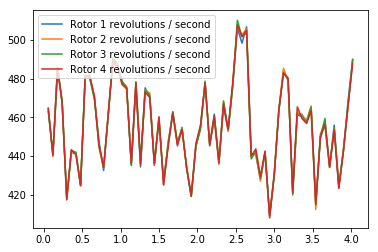

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  4.7260252   -4.23586029  26.25471414   6.0386292    6.14696228   0.        ]
[ 3.34206364 -4.14087635  5.79220321]
[-0.12745473 -0.07254727  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.task_sample import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.415 (best =   0.075), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
%reload_ext autoreload
%autoreload 2


from agents.agent import Agent
from tasks.task import Task

# Modify the values below to give the quadcopter a different starting position.

runtime = 4.                                     # time limit of the episode
num_episodes = 1000
best_score = - 100

init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

target_pos = np.array([10., 10., 0.])
target_v = np.array([0., 0., 0.])

task = Task(target_pos=target_pos)
agent = Agent(task) 

rewards = []
action_info = {}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        best_score = max(best_score, score)
        
        if done:
            print("\r{:4d}. score: {:5.3f} best: {:5.3f} pos: ({:5.2f},{:5.2f},{:5.2f}) vel: ({:5.2f},{:5.2f},{:5.2f})".format(
                i_episode, 
                score, 
                best_score, 
                task.sim.pose[0],
                task.sim.pose[1],
                task.sim.pose[2],
                task.sim.v[0],
                task.sim.v[1],
                task.sim.v[2]))  # [debug]
            break

    rewards.append(score)
    action_info[i_episode] = {'Episode': i_episode, 'Reward':score,'Action':action,
                        'x': task.sim.pose[0], 'y': task.sim.pose[1], 'z': task.sim.pose[2],
                        'v_x':task.sim.v[0], 'v_y': task.sim.v[1], 'v_z': task.sim.v[2]}
    sys.stdout.flush()

Using TensorFlow backend.


   1. score: 67.728 best: 67.728 pos: (-4.90, 7.65, 0.00) vel: (-2.55, 8.14,-12.62)
   2. score: 67.727 best: 67.728 pos: (-4.88, 7.64, 0.00) vel: (-2.59, 8.14,-12.34)
   3. score: 60.954 best: 67.728 pos: (-4.32, 7.50, 0.00) vel: (-1.15, 5.88,-19.74)
   4. score: 89.637 best: 89.637 pos: (-25.20, 1.82, 0.00) vel: (-8.99, 1.68,-18.75)
   5. score: 56.433 best: 89.637 pos: (-0.81,-0.00, 0.00) vel: (-0.55, 0.27,-12.87)
   6. score: 63.169 best: 89.637 pos: (-1.06,-0.56, 0.00) vel: (-0.55,-0.28,-14.49)
   7. score: 67.889 best: 89.637 pos: ( 7.12, 2.74, 0.00) vel: ( 9.30,-1.73,-10.65)
   8. score: 150.564 best: 150.564 pos: (-3.09, 2.94,25.91) vel: (-2.47, 4.27, 2.55)
   9. score: 63.300 best: 150.564 pos: ( 1.48, 4.83, 0.00) vel: ( 1.30, 0.07,-10.13)
  10. score: 54.177 best: 150.564 pos: (-1.72, 3.10, 0.00) vel: (-0.49, 8.04,-12.00)
  11. score: 99.534 best: 150.564 pos: ( 1.54,24.92, 0.00) vel: (-0.10,17.74,-5.42)
  12. score: 49.587 best: 150.564 pos: (-4.45,-4.40, 0.00) vel: (-2.62,-

  98. score: 56.428 best: 151.027 pos: (-2.46, 2.72, 0.00) vel: (-2.94, 3.25,-16.31)
  99. score: 65.419 best: 151.027 pos: (-3.32, 1.02, 0.00) vel: (-0.84, 1.11,-17.07)
 100. score: 65.452 best: 151.027 pos: (-4.90, 4.08, 0.00) vel: (-4.33, 4.54,-9.53)
 101. score: 56.396 best: 151.027 pos: (-3.04, 0.52, 0.00) vel: (-1.92, 2.43,-13.58)
 102. score: 58.692 best: 151.027 pos: (-0.77,-0.85, 0.00) vel: (-0.10,-5.87,-16.29)
 103. score: 54.182 best: 151.027 pos: (-3.29, 5.05, 0.00) vel: (-3.25, 6.18,-19.45)
 104. score: 69.962 best: 151.027 pos: (-4.83, 3.02, 0.00) vel: (-3.76,-1.59,-12.92)
 105. score: 58.672 best: 151.027 pos: (-6.22, 3.59, 0.00) vel: (-6.54, 3.41,-14.14)
 106. score: 60.911 best: 151.027 pos: (-4.81, 2.34, 0.00) vel: (-4.45, 5.17,-13.42)
 107. score: 63.265 best: 151.027 pos: ( 1.50, 4.05, 0.00) vel: ( 2.25, 3.26,-11.95)
 108. score: 63.198 best: 151.027 pos: (-2.18, 0.86, 0.00) vel: (-1.95,-2.64,-15.89)
 109. score: 63.119 best: 151.027 pos: (-8.86, 1.73, 0.00) vel: (-

 195. score: 63.329 best: 151.027 pos: (12.76, 0.80, 0.00) vel: ( 9.83,-0.13,-15.90)
 196. score: 63.210 best: 151.027 pos: (-1.30, 1.91, 0.00) vel: (-3.34, 2.74,-17.93)
 197. score: 65.483 best: 151.027 pos: (-0.24, 1.87, 0.00) vel: (-3.23,-0.41,-14.87)
 198. score: 67.749 best: 151.027 pos: (-1.04, 1.15, 0.00) vel: (-8.02,-0.09,-13.73)
 199. score: 65.494 best: 151.027 pos: ( 1.49, 1.82, 0.00) vel: ( 3.80,-0.22,-13.42)
 200. score: 65.477 best: 151.027 pos: (-1.16, 2.03, 0.00) vel: ( 2.95, 2.06,-14.16)
 201. score: 65.475 best: 151.027 pos: (-1.61, 2.12, 0.00) vel: ( 2.38, 2.11,-14.27)
 202. score: 65.486 best: 151.027 pos: (-0.15, 1.94, 0.00) vel: (-3.51, 0.72,-14.85)
 203. score: 63.200 best: 151.027 pos: (-2.53, 1.02, 0.00) vel: (-0.68,-2.04,-14.65)
 204. score: 65.467 best: 151.027 pos: (-4.03, 3.78, 0.00) vel: (-4.20, 6.99,-16.12)
 205. score: 65.472 best: 151.027 pos: (-0.65, 2.29, 0.00) vel: ( 5.29, 2.56,-13.75)
 206. score: 63.212 best: 151.027 pos: (-1.29, 1.60, 0.00) vel: (

 292. score: 67.727 best: 151.027 pos: (-0.65, 3.63, 0.00) vel: (-0.47,-5.94,-19.66)
 293. score: 65.430 best: 151.027 pos: (-0.07,-1.92, 0.00) vel: ( 5.33,-2.77,-13.56)
 294. score: 60.922 best: 151.027 pos: ( 0.90,-3.44, 0.00) vel: ( 0.35,-8.14,-15.82)
 295. score: 72.233 best: 151.027 pos: (-0.16, 1.97, 0.00) vel: ( 2.25, 3.23,-14.09)
 296. score: 65.492 best: 151.027 pos: ( 3.00,-0.45, 0.00) vel: (-3.38,-1.98,-13.80)
 297. score: 72.054 best: 151.027 pos: (-7.64,-5.20, 0.00) vel: (-5.36,-3.77,-13.27)
 298. score: 60.923 best: 151.027 pos: ( 1.61,-0.23, 0.00) vel: ( 5.28, 0.88,-16.97)
 299. score: 58.650 best: 151.027 pos: (-2.57,-0.44, 0.00) vel: (-2.37, 0.67,-15.81)
 300. score: 63.146 best: 151.027 pos: ( 0.36,-3.48, 0.00) vel: ( 3.38,-1.38,-16.15)
 301. score: 69.967 best: 151.027 pos: ( 0.71,-0.91, 0.00) vel: (-0.01,-2.73,-13.17)
 302. score: 63.173 best: 151.027 pos: ( 2.30,-0.77, 0.00) vel: (12.10, 2.01,-14.24)
 303. score: 60.912 best: 151.027 pos: (-1.63,-0.81, 0.00) vel: (

 389. score: 60.984 best: 151.027 pos: ( 5.82, 0.21, 0.00) vel: ( 8.38,-1.18,-14.92)
 390. score: 58.754 best: 151.027 pos: (-0.01, 5.67, 0.00) vel: (-3.24, 5.30,-13.33)
 391. score: 58.754 best: 151.027 pos: ( 0.78, 5.16, 0.00) vel: ( 2.18, 2.02,-14.55)
 392. score: 58.755 best: 151.027 pos: ( 0.03, 5.68, 0.00) vel: (-2.03, 5.73,-14.16)
 393. score: 56.430 best: 151.027 pos: (-0.97,-1.17, 0.00) vel: (-7.28,-3.00,-15.78)
 394. score: 63.292 best: 151.027 pos: ( 2.56, 4.43, 0.00) vel: (-1.27, 1.70,-11.62)
 395. score: 63.302 best: 151.027 pos: ( 3.45, 6.03, 0.00) vel: ( 6.65, 5.63,-14.68)
 396. score: 61.034 best: 151.027 pos: ( 3.31, 5.78, 0.00) vel: ( 7.69, 6.69,-13.59)
 397. score: 58.759 best: 151.027 pos: ( 3.49, 4.14, 0.00) vel: ( 6.32, 3.22,-13.73)
 398. score: 58.761 best: 151.027 pos: ( 3.80, 4.18, 0.00) vel: ( 6.85, 3.22,-13.69)
 399. score: 56.487 best: 151.027 pos: ( 1.90, 4.70, 0.00) vel: ( 6.04, 4.16,-15.22)
 400. score: 58.763 best: 151.027 pos: ( 3.89, 4.14, 0.00) vel: (

 486. score: 83.468 best: 151.027 pos: (-2.78, 3.84, 0.00) vel: (-4.14, 6.92,-18.41)
 487. score: 149.528 best: 151.027 pos: (10.49, 0.16,64.05) vel: (10.97, 2.67,14.05)
 488. score: 149.401 best: 151.027 pos: ( 5.51,-0.00,65.06) vel: ( 7.97,-0.00,16.43)
 489. score: 88.019 best: 151.027 pos: ( 1.28,-0.56, 0.00) vel: ( 1.09, 0.91,-15.68)
 490. score: 79.090 best: 151.027 pos: ( 4.98, 4.62, 0.00) vel: ( 8.45, 1.06,-14.88)
 491. score: 83.469 best: 151.027 pos: ( 0.88, 0.43, 0.00) vel: ( 1.84,-2.74,-22.35)
 492. score: 96.787 best: 151.027 pos: (-6.03,-7.63, 0.00) vel: (-9.78,-3.28,-24.44)
 493. score: 83.515 best: 151.027 pos: ( 7.06, 0.24, 0.00) vel: (12.34,-1.96,-22.07)
 494. score: 149.403 best: 151.027 pos: (-1.96, 0.37,59.98) vel: (-4.02, 6.15,12.12)
 495. score: 58.709 best: 151.027 pos: ( 0.01,-1.47, 0.00) vel: (-0.12,-5.21,-15.02)
 496. score: 70.001 best: 151.027 pos: ( 0.23, 5.91, 0.00) vel: ( 0.47, 8.55,-21.07)
 497. score: 94.802 best: 151.027 pos: (-1.21, 1.99, 0.00) vel: (

 583. score: 65.477 best: 151.027 pos: (-1.46, 1.93, 0.00) vel: (-4.04, 1.99,-14.11)
 584. score: 65.476 best: 151.027 pos: (-1.49, 1.98, 0.00) vel: (-2.94, 0.48,-16.30)
 585. score: 65.486 best: 151.027 pos: (-0.46, 2.07, 0.00) vel: (-3.76, 0.65,-15.64)
 586. score: 65.475 best: 151.027 pos: (-1.38, 2.05, 0.00) vel: (-3.12, 1.33,-15.26)
 587. score: 65.496 best: 151.027 pos: ( 1.25, 1.99, 0.00) vel: (-2.37,-0.39,-15.65)
 588. score: 65.493 best: 151.027 pos: ( 1.21, 2.40, 0.00) vel: ( 2.95, 2.53,-14.79)
 589. score: 65.473 best: 151.027 pos: (-1.63, 1.77, 0.00) vel: (-3.76, 0.14,-13.81)
 590. score: 65.482 best: 151.027 pos: (-0.63, 2.03, 0.00) vel: (-1.52, 0.97,-14.57)
 591. score: 65.487 best: 151.027 pos: (-0.27, 2.05, 0.00) vel: (-4.42,-0.17,-15.74)
 592. score: 65.446 best: 151.027 pos: (-5.63, 1.39, 0.00) vel: (-11.97, 0.37,-13.14)
 593. score: 65.489 best: 151.027 pos: ( 0.12, 2.11, 0.00) vel: (-3.70, 1.46,-15.11)
 594. score: 65.491 best: 151.027 pos: ( 0.91, 1.96, 0.00) vel: 

 680. score: 149.622 best: 151.027 pos: (18.36, 0.00,61.39) vel: (13.80, 0.00,12.25)
 681. score: 149.247 best: 151.027 pos: (-6.89,-0.00,64.70) vel: (-5.92,-0.00,16.37)
 682. score: 149.325 best: 151.027 pos: (-2.72,-0.00,65.17) vel: (-1.82, 0.00,17.21)
 683. score: 149.365 best: 151.027 pos: ( 0.92,-0.00,65.21) vel: ( 1.05,-0.00,17.17)
 684. score: 149.486 best: 151.027 pos: ( 7.17, 0.00,64.65) vel: ( 5.75, 0.00,16.44)
 685. score: 149.509 best: 151.027 pos: ( 9.21,-0.00,64.30) vel: ( 8.51,-0.00,15.53)
 686. score: 149.611 best: 151.027 pos: (16.46,-0.00,62.14) vel: (13.07,-0.00,12.90)
 687. score: 149.104 best: 151.027 pos: (-17.81,-0.00,61.34) vel: (-14.96,-0.00,11.35)
 688. score: 149.364 best: 151.027 pos: ( 1.25, 0.01,65.27) vel: ( 2.39, 0.00,17.14)
 689. score: 149.469 best: 151.027 pos: ( 6.08,-0.00,64.80) vel: ( 5.09,-0.00,16.59)
 690. score: 149.279 best: 151.027 pos: (-7.15,-0.00,64.55) vel: (-7.76, 0.00,15.80)
 691. score: 149.124 best: 151.027 pos: (-15.93,-0.00,62.20) ve

 776. score: 149.565 best: 151.027 pos: (11.82, 0.00,63.65) vel: (10.22, 0.00,14.73)
 777. score: 149.370 best: 151.027 pos: ( 0.81,-0.00,65.22) vel: ( 0.89,-0.00,17.18)
 778. score: 149.391 best: 151.027 pos: (-1.40, 0.00,65.22) vel: (-4.38,-0.00,16.87)
 779. score: 149.223 best: 151.027 pos: (-9.82, 0.00,64.04) vel: (-9.90, 0.00,14.93)
 780. score: 149.343 best: 151.027 pos: (-1.13, 0.00,65.23) vel: (-0.63, 0.00,17.20)
 781. score: 149.574 best: 151.027 pos: (10.75, 0.01,64.08) vel: ( 6.98, 0.00,16.23)
 782. score: 149.214 best: 151.027 pos: (-6.98, 0.01,64.93) vel: (-3.33, 0.01,17.20)
 783. score: 149.183 best: 151.027 pos: (-11.23, 0.00,63.79) vel: (-8.96, 0.00,15.25)
 784. score: 149.111 best: 151.027 pos: (-17.26,-0.00,61.68) vel: (-13.07,-0.00,12.96)
 785. score: 149.137 best: 151.027 pos: (-14.93, 0.00,62.69) vel: (-11.03, 0.00,14.32)
 786. score: 149.381 best: 151.027 pos: (-5.18,-0.00,64.57) vel: (-10.75,-0.00,14.74)
 787. score: 149.225 best: 151.027 pos: (-4.62, 0.00,65.38)

 872. score: 149.096 best: 151.027 pos: (-18.86, 0.00,60.84) vel: (-14.72, 0.00,11.43)
 873. score: 149.145 best: 151.027 pos: (-12.23, 0.01,63.73) vel: (-8.27, 0.01,15.69)
 874. score: 149.383 best: 151.027 pos: ( 2.69,-0.00,65.17) vel: ( 3.16,-0.00,16.97)
 875. score: 149.378 best: 151.027 pos: ( 0.42, 0.00,65.24) vel: (-0.44, 0.00,17.21)
 876. score: 149.502 best: 151.027 pos: ( 6.84,-0.00,64.80) vel: ( 4.13,-0.00,16.87)
 877. score: 149.639 best: 151.027 pos: (18.64,-0.00,61.64) vel: (12.23,-0.00,13.70)
 878. score: 149.177 best: 151.027 pos: (-8.67,-0.00,64.69) vel: (-4.46,-0.00,16.98)
 879. score: 149.143 best: 151.027 pos: (-16.44, 0.00,61.74) vel: (-14.17, 0.00,11.99)
 880. score: 149.025 best: 151.027 pos: (-21.00,-0.00,60.46) vel: (-14.18,-0.00,12.02)
 881. score: 149.201 best: 151.027 pos: (-9.44, 0.00,64.29) vel: (-6.87, 0.00,16.09)
 882. score: 149.308 best: 151.027 pos: (-2.93,-0.00,65.16) vel: (-3.13,-0.00,17.02)
 883. score: 149.172 best: 151.027 pos: (-9.91,-0.00,64.54

 968. score: 149.335 best: 151.027 pos: (-0.82, 0.00,65.25) vel: ( 0.20, 0.00,17.24)
 969. score: 149.146 best: 151.027 pos: (-18.41, 0.00,60.28) vel: (-17.92, 0.00, 8.38)
 970. score: 149.302 best: 151.027 pos: (-5.71, 0.00,64.80) vel: (-8.41,-0.00,15.77)
 971. score: 149.229 best: 151.027 pos: (-9.01, 0.01,64.25) vel: (-8.45, 0.00,15.53)
 972. score: 149.224 best: 151.027 pos: (-6.68, 0.01,64.96) vel: (-3.18, 0.01,17.27)
 973. score: 149.237 best: 151.027 pos: (-7.84,-0.00,64.52) vel: (-6.99,-0.00,16.05)
 974. score: 149.440 best: 151.027 pos: ( 1.93,-0.00,65.35) vel: (-1.95,-0.00,17.33)
 975. score: 149.414 best: 151.027 pos: ( 3.83,-0.00,65.11) vel: ( 4.55,-0.00,16.85)
 976. score: 149.162 best: 151.027 pos: (-13.88,-0.00,62.88) vel: (-11.36,-0.00,14.01)
 977. score: 149.301 best: 151.027 pos: (-4.00,-0.01,65.06) vel: (-3.92,-0.00,16.85)
 978. score: 149.328 best: 151.027 pos: (-1.09, 0.00,65.23) vel: (-0.19, 0.00,17.20)
 979. score: 149.505 best: 151.027 pos: ( 6.77,-0.00,64.82) v

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [11]:
## TODO: Plot the rewards.

pd_rewards = pd.DataFrame(action_info).T
pd_rewards = pd_rewards[['Episode','Reward','Action','x', 'y', 'z', 'v_x', 'v_y', 'v_z']]
pd_rewards = pd_rewards.set_index('Episode')
pd_rewards.sample(4)

,Reward,Action,x,y,z,v_x,v_y,v_z
Episode,,,,,,,,
69,58.708,"[-0.333655895288, 65.2148966973, 899.40015401,...",-1.06847,3.15297,0,-1.14622,4.02165,-14.9538
12,49.5871,"[0.622960686885, 900.417287849, 0.276520477535...",-4.44592,-4.39595,0,-2.61922,-7.80836,-17.7601
707,148.988,"[900.494787444, 900.456266969, -0.531286121957...",-27.2227,0.00221335,55.9087,-19.3689,0.00120268,5.6357
520,65.4813,"[900.622298304, 899.557336906, -0.512259626056...",-0.831956,1.8397,0,0.650212,0.890595,-15.2901


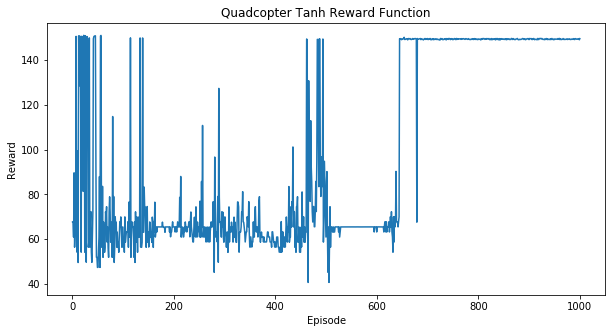

In [12]:
# plot rewards vs. episodes

plt.figure(figsize=(10,5))
plt.plot(pd_rewards['Reward'])
plt.title("Quadcopter Tanh Reward Function")
plt.xlabel('Episode')
plt.ylabel('Reward')
#plt.savefig('../charts/reward-arctan')
plt.show()

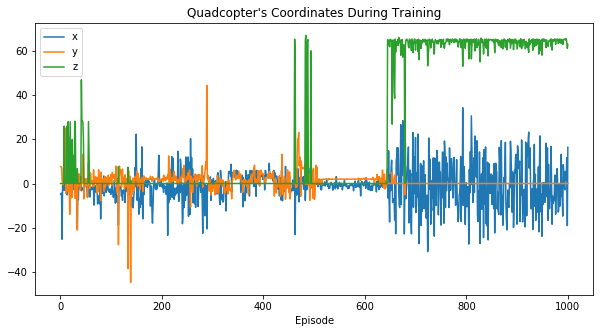

In [13]:
# position during training

plt.figure(figsize=(10,5))
plt.plot(pd_rewards['x'], label='x')
plt.plot(pd_rewards['y'], label='y')
plt.plot(pd_rewards['z'], label='z')
plt.legend()

plt.title("Quadcopter's Coordinates During Training")
plt.xlabel('Episode')
plt.show()

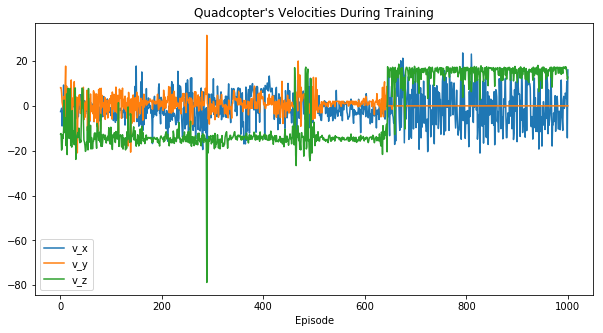

In [14]:
# velocities during training

plt.figure(figsize=(10,5))
plt.plot(pd_rewards['v_x'], label='v_x')
plt.plot(pd_rewards['v_y'], label='v_y')
plt.plot(pd_rewards['v_z'], label='v_z')
plt.legend()

plt.title("Quadcopter's Velocities During Training")
plt.xlabel('Episode')
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task is to reach a target position, specified at (10, 10, 0). 

I tried several reward functions with several choices of state spaces, such as distance to the target, distance and speed, distance, speed and angular velocities. I also experimented with different parameters. Some of the functions I tried:

* the ARD squared-exponential covariance function which decays with the distance between points, see [Anderson et al.](https://www.aaai.org/ocs/index.php/AAAI/AAAI15/paper/download/9850/9878);
* a product of exponential functions designed to encourage convergence of states to the vicinity of the target position, see [Omidshafiei](https://pdfs.semanticscholar.org;/400d/9f18a48701c7728c774209867c68f894a573.pdf);
* a power function in the distance to the target position, see [Bonsai](https://www.youtube.com/watch?v=0R3PnJEisqk);
* used shaping to obtain a smooth gradient of reward as the quadcopter approaches the target, in particular I looked at two functions whose graphs have similar shapes: arctan(x) and tanh(x).

All these functions but one, reward function of type tanh(x), have oscillating behavior over the duration of 500-1000 episodes.

The reward function I finally chosed, a hyperbolic tangent in position stabilizes after a certain number of steps to a maximum attained value, which I believe is a local minimum: 

$$ R = \tanh \left (1 - 0.0008 \cdot \sum_{i=1}^{i=3} |x_i - x_{i0}|\right)$$  

As the quadcopter approaches the target position the reward $R$  approaches the value $ \displaystyle \frac{e^2 -1}{e^2 + 1}$; after each episode the agent receives a reward which is reduced by a factor of the distance from the target position.     

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the sample actor - critic model provided by Udacity that uses DDPG (Deep Deterministic Policy Gradient) algorithm. The algorithm parameters are $\gamma = 0.99$ (the discount factor) and $\tau = 0.01$ (for soft update of target parameters). I also included an Ornstein–Uhlenbeck noise process and a buffer to store the experiences. 

The actor neuronal net has an input layer, followed by a three groups of hidden layers. In each group of hidden layers there is a Dense layer (the sizes are 256, 512 and 256) with L2 kernel regularizer, a Batch Normalization layer and a RELu activation layer. The Dense output layer has an Uniform kernel initializer and Sigmoid activation. I maintained the Adam optimizer used in the provided model.

The critic neronal net has actions and states input layers. There are two groups of hidden layers for the state pathway. The first group contains a Dense layers with 32 cells, with L2 regularizer, a Batch Normalization layer and RELu activation layer, the second group has a Dense layer with 64 cells, with L2 regularization and a RELu activation layer. For the action pathway there are two Dense layers (sizes 32 and 64) with L2 regularizers and RELu activations. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

As we can see from the rewards vs. episode curve there is a lot of bouncing during the first $600$ episodes. The quadcopter would reach a large reward, close to the best value of $151$ after which would fall back into the range of $50-90$. Eventually after about $680$ episodes the rewards stabilize on an average of $146$. There were lots of aha moments, which indicate the interplay between exploration and exploitation. It did take several hundred of episodes to reach the best reward available (which may very well be a local minimum) so I would say it did take a long time to learn (comparatively to 1000 episodes). Comparatively with other experiments where the number of episodes is in the range of millions it did not take too long to learn. The performance during the last $100$ of episodes is within $96 \%$ of the best reward value of $151$.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The most difficult part was to find a reward function that would give a reasonable output. Although I found several types of functions that would work to a certain extent, I was not able to get acceptable results in most of the cases. This brings me to the second difficulty encountered, gettting appropriate values for the parameters. Although I tried several options, I was not able to obtain satisfactory results when I expanded the state space to include velocities and angular velocities. In these cases the results would not stabilize. The quadcopter would pass close to the target and end up in a remote position, it would bounce back and forth. I assume that this might be due to the fact that I did not properly adjust all the physical parameters of the system or due to an unbalanced exploration - exploitation tradeoff. 

I also find intriguing how the parameters would change from simulation to simulation, in particular the Euler angles and the angular velocities. The $\psi$-angle and velocity are zero most of the time. I also noticed that the agent behaves differently during various experiments with the same parameters. I am inclined to believe that the results are not robust and that the learning process depends on the first few episodes. 

This project was much more harder than the previous projects in this nanodegree mostly due to the lack of time and understanding of all the pieces neccessary to put the results together. For example, I would think that a more descriptive pysics simulation would have benefited my understanding of the problem. The actor-critic models provided in the lectures were extremely useful, but again there was very little information accompanying them.   